<a href="https://colab.research.google.com/github/KangHyeonGu1/-/blob/main/disaster_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('disaster.csv')
data.head()

,id,frame,donate,justify,skeptic
0,1,1,5.6,2.95,1.8
1,2,1,4.2,2.85,5.2
2,3,1,4.2,3.00,3.2
3,4,1,4.6,3.30,1.0
4,5,1,3.0,5.00,7.6


In [3]:
# 독립변수 회의감 삼각퍼지화
sk=data['skeptic']
skm=sk.mean()
sk2=sk-skm
x1= sk-0.5
x2= sk+0.5
xdf=pd.DataFrame({'a':x1,'b':sk,'c':x2})
x=xdf.to_numpy()



In [4]:
# 종속변수 기부긍정성 삼각퍼지화
do=data['donate']
dom=do.mean()
do2=do-dom
y1= do-0.5
y2= do+0.5
ydf=pd.DataFrame({'a':y1,'b':do,'c':y2})
y=ydf.to_numpy()


In [5]:
# 매개변수 기부정당성 삼각퍼지화
ju=data['justify']
jum=ju.mean()
ju2=ju-jum
m1= ju-0.5
m2= ju+0.5
mdf=pd.DataFrame({'a':m1,'b':ju,'c':m2})
m=mdf.to_numpy()


In [6]:
# 이분형 조절변수 프레임기사 (0,0,0) (1,1,1)로 
fr=data['frame']
wdf=pd.DataFrame({'a':fr,'b':fr,'c':fr})
w=wdf.to_numpy()

In [7]:
xw= x*w  
ones=np.ones(shape=(211,3))
def dc(a,b):          # 삼각퍼지 행렬곱 함수
  c=a*b
  sum=c.sum()
  return sum
xtx=np.zeros(shape=(4,4))
xlist=[ones,x,w,xw]
for i in range(0,4):    # 회귀계수 추정을 위한 삼각퍼지 x대치행렬과 x행렬 행렬곱 for문
  for j in range(0,4):
    xtx[i,j]= dc(xlist[i],xlist[j])
xtm=np.zeros(shape=(4,1))
for i in range(0,4):    # 회귀계수 추정을 위한 삼각퍼지 x대치행렬과 m행렬 행렬곱 for문
  for j in range(0,1):
    xtm[i,j]= dc(xlist[i],m)
lxtx=np.linalg.inv(xtx)
b=lxtx@xtm
b=np.around(b, decimals=4)
b  # m= b0+ b1x + b2w + b3xw 의 회귀계수 추정치 w의 추정치가 이상하게 나옴 수정필요.

array([[ 2.3357],
       [ 0.1398],
       [-0.5396],
       [ 0.1937]])

M = 2.8065 + 0.1051X + 0.1171W + 0.2012XW (crisp data)

M = 2.3357 + 0.1398X - 0.5396W + 0.1937XW (삼각퍼지화 데이터)

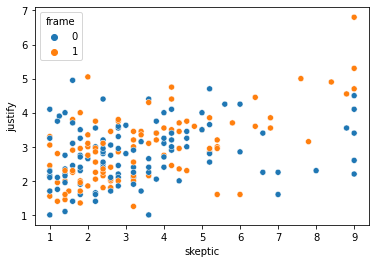

In [10]:
sns.scatterplot(data=data,x='skeptic',y='justify',hue='frame')

In [12]:
xtx2=np.zeros(shape=(5,5))
xlist2=[ones,x,w,xw,m]
for i in range(0,5):  # 회귀계수 추정을 위한 삼각퍼지 x대치행렬과 x행렬 행렬곱 for문
  for j in range(0,5):
    xtx2[i,j]= dc(xlist2[i],xlist2[j])
xty=np.zeros(shape=(5,1))
for i in range(0,5):    # 회귀계수 추정을 위한 삼각퍼지 x대치행렬과 y행렬 행렬곱 for문
  for j in range(0,1):
    xty[i,j]= dc(xlist2[i],y)
lxtx2=np.linalg.inv(xtx2)
b2=lxtx2@xty
b2=np.around(b2, decimals=4)
b2  # y= b0+ b1x + b2w + b3xw + b4m 의 회귀계수 추정치  수정필요

array([[ 6.2589],
       [-0.013 ],
       [ 0.3331],
       [-0.0494],
       [-0.5895]])

Y = 7.1477 - 0.0426X + 0.2107W + 0.0149XW - 0.9227M (crisp data)

Y = 6.2589 - 0.013X + 0.3331W - 0.0494XW - 0.5895M (삼각퍼지화 데이터)